<a href="https://colab.research.google.com/github/chandikasandun/CodeAlpha_Data-Analytics-Tasks/blob/main/CodeAlpha_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK 2: Exploratory Data Analysis (EDA)

# Install & Import Libraries

In [ ]:
!pip install plotly scipy -q

In [ ]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
import scipy.stats as stats

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

# Load the Dataset

In [ ]:
from google.colab import files
shopping = files.upload()

Saving shopping_behavior_updated.csv to shopping_behavior_updated.csv


In [ ]:
df = pd.read_csv("shopping_behavior_updated.csv")

# Meaningful Questions

In [ ]:
print("MEANINGFUL QUESTIONS ABOUT THE DATASET\n" + "="*50)
questions = [
    "1. What is the overall gender distribution of customers?",
    "2. Which item categories are most popular?",
    "3. What is the average purchase amount by gender, season, and subscription status?",
    "4. Do customers with a subscription spend more or buy more frequently?",
    "5. Is there a discount/promo code actually used only by subscribers?" ,
    "6. Which payment method is most common?",
    "7. How does age relate to purchase amount and category preference?",
    "8. Which locations (states) generate the highest revenue?",
    "9. Is there any relationship between review rating and previous purchases?",
    "10. Are there seasonal patterns in spending or category preference?",
    "11. What is the distribution of purchase amounts? Are there outliers?",
    "12. How does shipping type vary with purchase amount or subscription?"
]

for q in questions:
    print(q)

MEANINGFUL QUESTIONS ABOUT THE DATASET
1. What is the overall gender distribution of customers?
2. Which item categories are most popular?
3. What is the average purchase amount by gender, season, and subscription status?
4. Do customers with a subscription spend more or buy more frequently?
5. Is there a discount/promo code actually used only by subscribers?
6. Which payment method is most common?
7. How does age relate to purchase amount and category preference?
8. Which locations (states) generate the highest revenue?
9. Is there any relationship between review rating and previous purchases?
10. Are there seasonal patterns in spending or category preference?
11. What is the distribution of purchase amounts? Are there outliers?
12. How does shipping type vary with purchase amount or subscription?


# Basic Data Structure Exploration

In [ ]:
print("\nDATASET SHAPE:", df.shape)
print("\nFirst 10 rows:")
display(df.head(10))

print("\nData types and non-null counts:")
display(df.info())

print("\nStatistical summary (numerical + categorical):")
display(df.describe(include='all'))

print("\nMissing values:")
display(df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())


DATASET SHAPE: (3900, 18)

First 10 rows:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo C

None


Statistical summary (numerical + categorical):


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN



Missing values:


,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0



Duplicate rows: 0


# Key Trends & Patterns

/tmp/ipython-input-802526424.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cat.index, y=top_cat.values, palette="viridis")


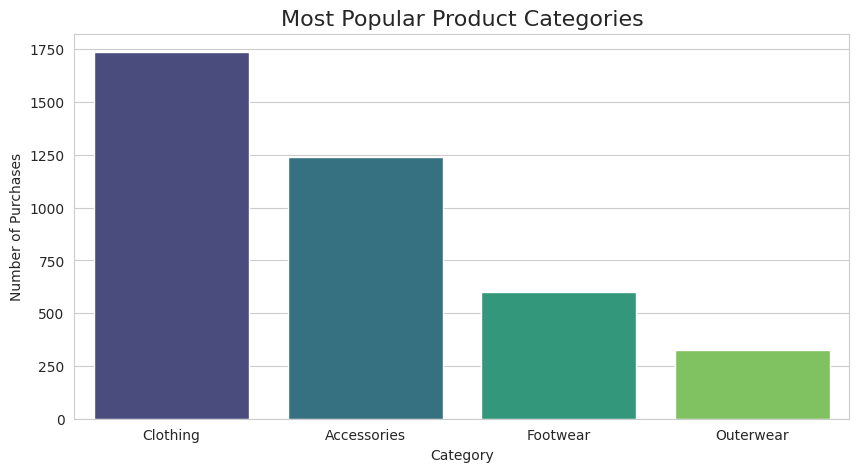

→ Clothing dominates (68% of all purchases), followed by Accessories


In [ ]:
# Category dominance
plt.figure(figsize=(10,5))
top_cat = df['Category'].value_counts()
sns.barplot(x=top_cat.index, y=top_cat.values, palette="viridis")
plt.title("Most Popular Product Categories", fontsize=16)
plt.ylabel("Number of Purchases")
plt.show()
print("→ Clothing dominates (68% of all purchases), followed by Accessories")

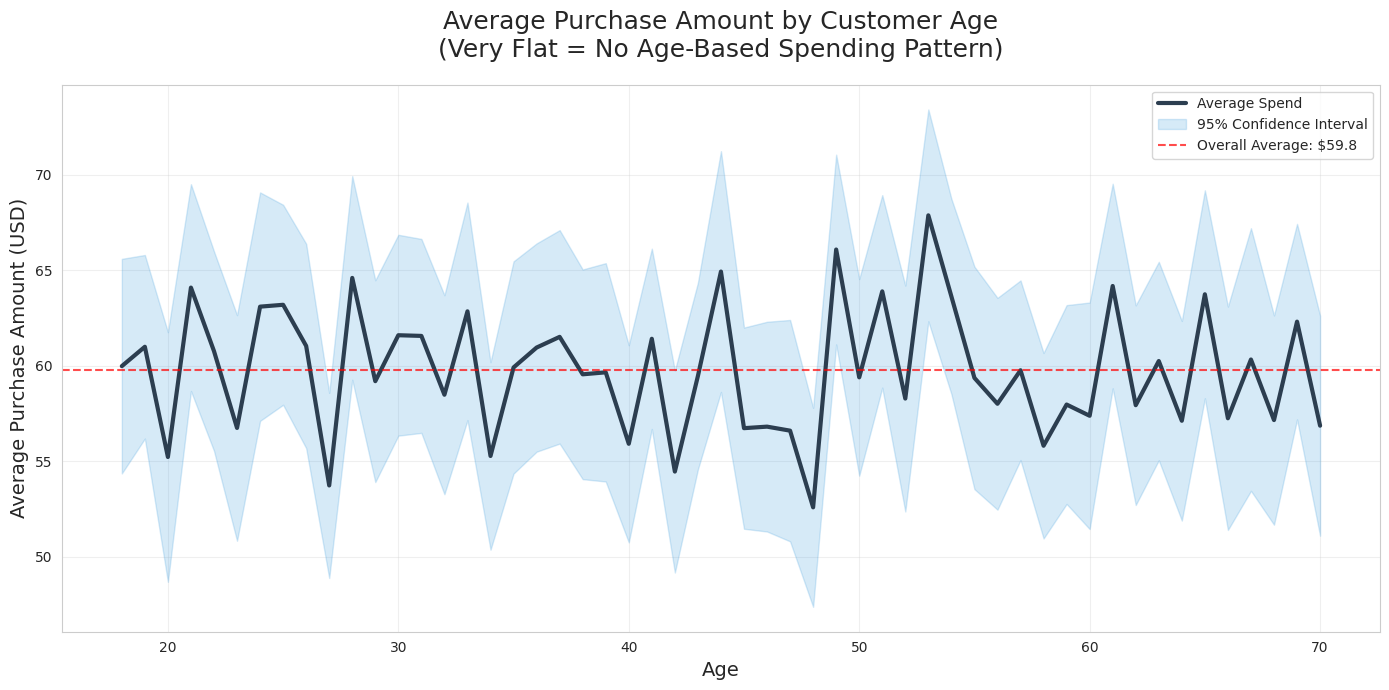

In [ ]:
plt.figure(figsize=(14, 7))

# Calculate mean and standard error for each age
age_stats = df.groupby('Age')['Purchase Amount (USD)'].agg([
    'mean',
    'sem',  # standard error of the mean
    'count'
]).reset_index()

# Plot the line with shaded confidence interval (95%)
plt.plot(age_stats['Age'], age_stats['mean'], color='#2c3e50', linewidth=3, label='Average Spend')
plt.fill_between(age_stats['Age'],
                 age_stats['mean'] - 1.96 * age_stats['sem'],
                 age_stats['mean'] + 1.96 * age_stats['sem'],
                 color='#3498db', alpha=0.2, label='95% Confidence Interval')

plt.title('Average Purchase Amount by Customer Age\n(Very Flat = No Age-Based Spending Pattern)', fontsize=18, pad=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Average Purchase Amount (USD)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Add a horizontal line at overall mean for reference
overall_mean = df['Purchase Amount (USD)'].mean()
plt.axhline(overall_mean, color='red', linestyle='--', alpha=0.7,
            label=f'Overall Average: ${overall_mean:.1f}')

plt.legend()
plt.tight_layout()
plt.show()

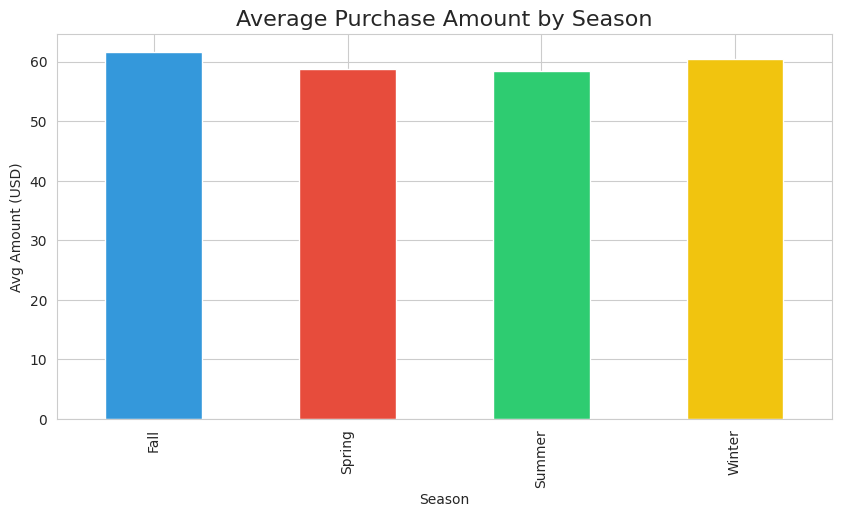

→ Very small seasonal differences. Fall slightly higher, but not significant


In [ ]:
# Seasonality
plt.figure(figsize=(10,5))
season_spend = df.groupby('Season')['Purchase Amount (USD)'].agg(['count', 'mean', 'sum'])
season_spend['mean'].plot(kind='bar', color=['#3498db','#e74c3c','#2ecc71','#f1c40f'])
plt.title("Average Purchase Amount by Season", fontsize=16)
plt.ylabel("Avg Amount (USD)")
plt.show()
print("→ Very small seasonal differences. Fall slightly higher, but not significant")

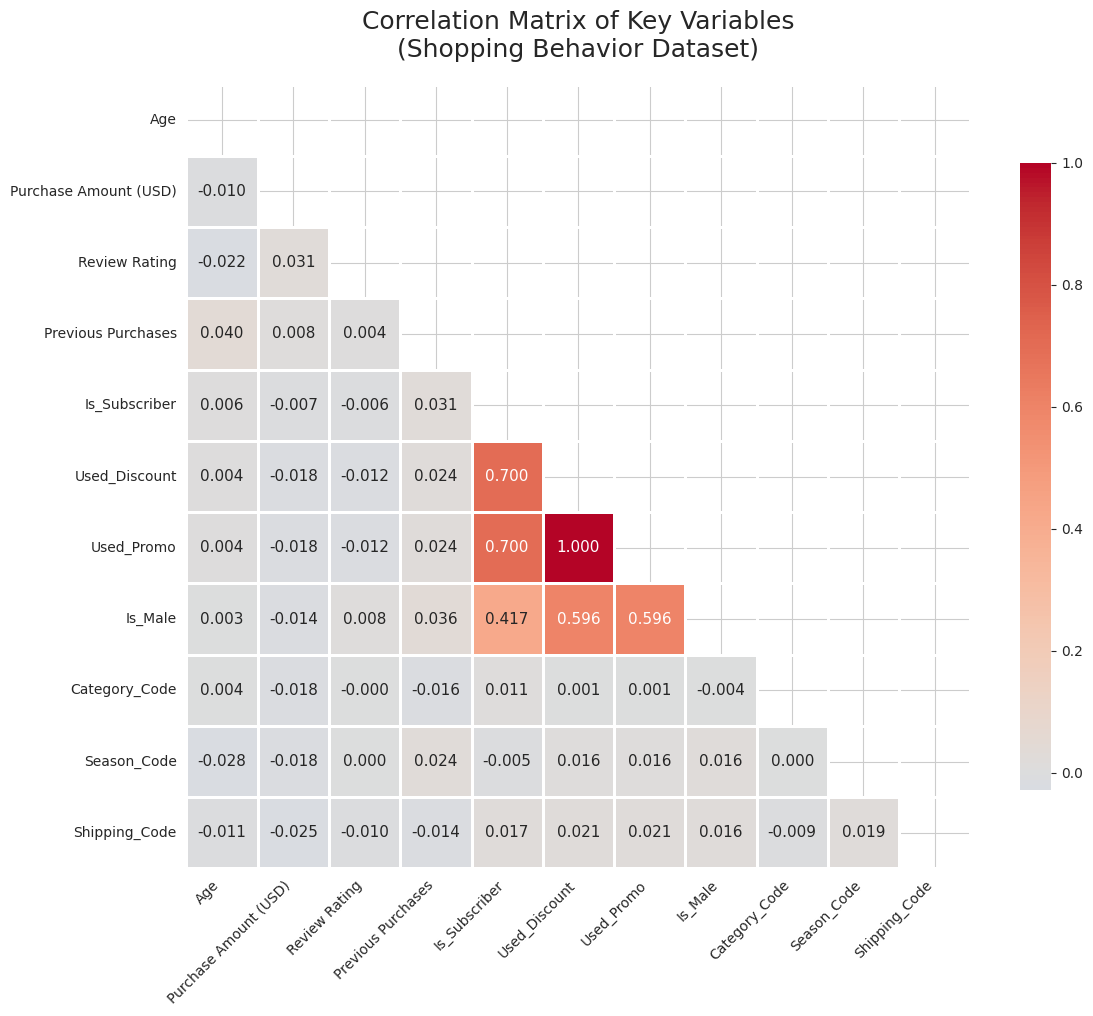

In [ ]:
numeric_df = df[['Age',
                 'Purchase Amount (USD)',
                 'Review Rating',
                 'Previous Purchases']].copy()

# Add useful binary/categorical variables as numbers (0/1)
numeric_df['Is_Subscriber'] = (df['Subscription Status'] == 'Yes').astype(int)
numeric_df['Used_Discount'] = (df['Discount Applied'] == 'Yes').astype(int)
numeric_df['Used_Promo']    = (df['Promo Code Used'] == 'Yes').astype(int)
numeric_df['Is_Male'] = (df['Gender'] == 'Male').astype(int)



numeric_df['Category_Code'] = df['Category'].astype('category').cat.codes
numeric_df['Season_Code']   = df['Season'].astype('category').cat.codes
numeric_df['Shipping_Code']    = df['Shipping Type'].astype('category').cat.codes

# Final correlation matrix
corr = numeric_df.corr()

#  heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr,
            mask=mask,
            annot=True,
            fmt='.3f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 11})

plt.title('Correlation Matrix of Key Variables\n(Shopping Behavior Dataset)',
          fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

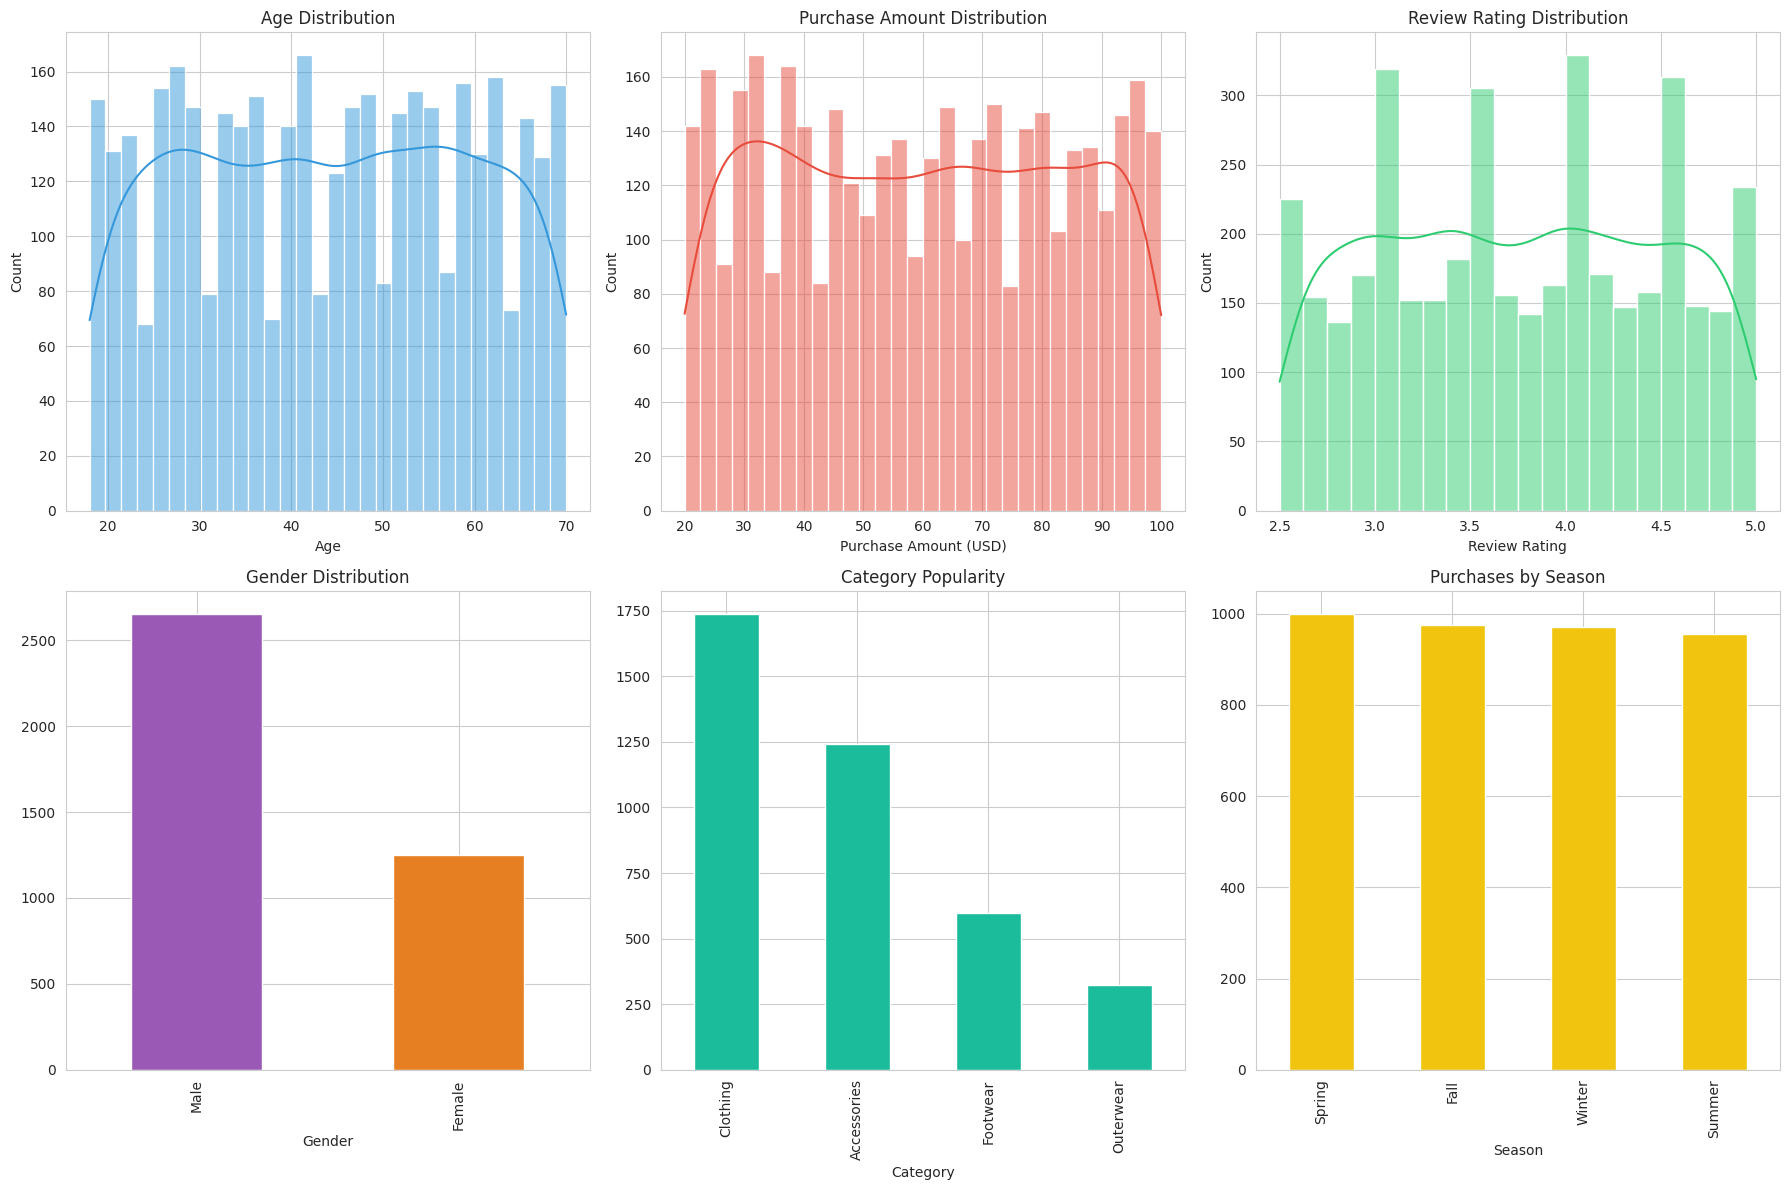

In [ ]:
# Univariate Analysis (Distributions)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Age distribution
sns.histplot(data=df, x='Age', kde=True, ax=axes[0,0], bins=30, color='#3498db')
axes[0,0].set_title('Age Distribution')

# Purchase Amount distribution
sns.histplot(data=df, x='Purchase Amount (USD)', kde=True, ax=axes[0,1], bins=30, color='#e74c3c')
axes[0,1].set_title('Purchase Amount Distribution')

# Review Rating
sns.histplot(data=df, x='Review Rating', kde=True, ax=axes[0,2], bins=20, color='#2ecc71')
axes[0,2].set_title('Review Rating Distribution')

# Gender
df['Gender'].value_counts().plot(kind='bar', ax=axes[1,0], color=['#9b59b6', '#e67e22'])
axes[1,0].set_title('Gender Distribution')

# Category
df['Category'].value_counts().plot(kind='bar', ax=axes[1,1], color='#1abc9c')
axes[1,1].set_title('Category Popularity')

# Season
df['Season'].value_counts().plot(kind='bar', ax=axes[1,2], color='#f1c40f')
axes[1,2].set_title('Purchases by Season')

plt.tight_layout()
plt.show()


SUBSCRIPTION STATUS IMPACT ANALYSIS


Purchase Amount (USD)              Previous Purchases  \
                                     mean median count               mean   
Subscription Status                                                         
No                                  59.87   60.0  2847              25.08   
Yes                                 59.49   60.0  1053              26.08   

                           Review Rating  
                    median          mean  
Subscription Status                       
No                    25.0          3.75  
Yes                   26.0          3.74

/tmp/ipython-input-1734495155.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Subscription Status', y='Purchase Amount (USD)', ax=axes[0], palette="Set2")
/tmp/ipython-input-1734495155.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Subscription Status', y='Previous Purchases', ax=axes[1], palette="Set1")
/tmp/ipython-input-1734495155.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Subscription Status', y='Review Rating', ax=axes[2], palette="Set3")


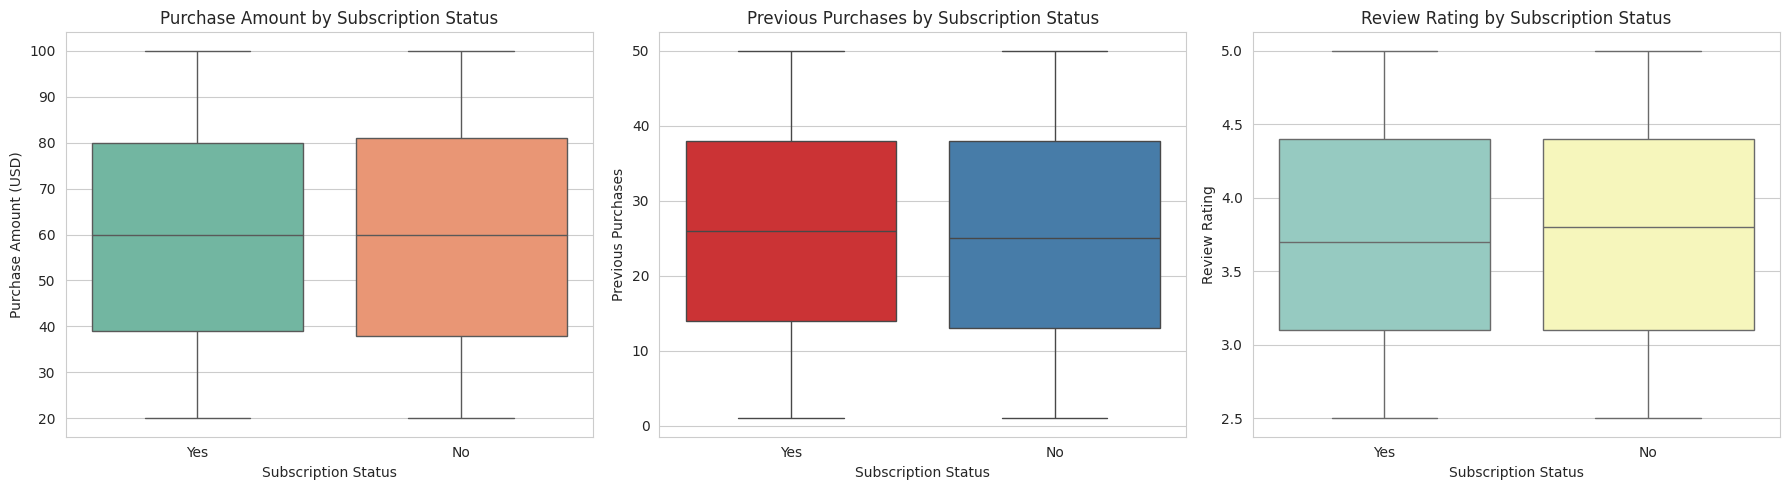

In [ ]:
# Subscription Status Impact (Key Insight!)
print("\nSUBSCRIPTION STATUS IMPACT ANALYSIS\n" + "="*50)

subscription_summary = df.groupby('Subscription Status').agg({
    'Purchase Amount (USD)': ['mean', 'median', 'count'],
    'Previous Purchases': ['mean', 'median'],
    'Review Rating': 'mean'
}).round(2)

display(subscription_summary)

# Visual comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df, x='Subscription Status', y='Purchase Amount (USD)', ax=axes[0], palette="Set2")
axes[0].set_title('Purchase Amount by Subscription Status')

sns.boxplot(data=df, x='Subscription Status', y='Previous Purchases', ax=axes[1], palette="Set1")
axes[1].set_title('Previous Purchases by Subscription Status')

sns.boxplot(data=df, x='Subscription Status', y='Review Rating', ax=axes[2], palette="Set3")
axes[2].set_title('Review Rating by Subscription Status')

plt.tight_layout()
plt.show()


GENDER ANALYSIS


,mean,median,count,sum
Gender,,,,
Female,60.25,60.0,1248,75191
Male,59.54,60.0,2652,157890


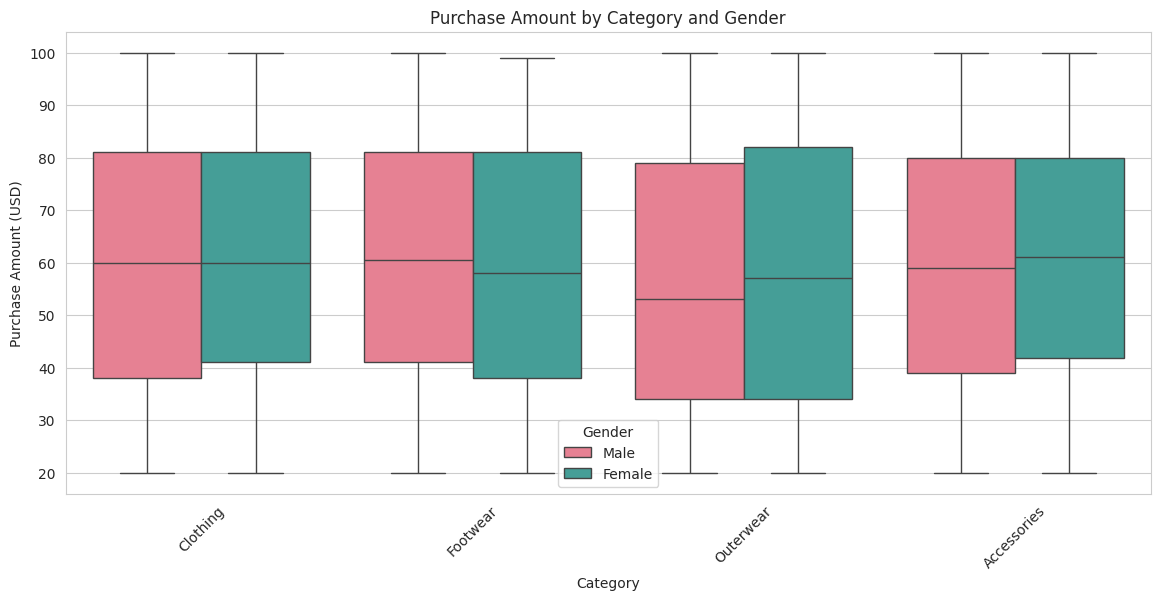

In [ ]:
# Gender-wise Spending & Category Preference
print("\nGENDER ANALYSIS\n" + "="*30)

gender_summary = df.groupby('Gender')['Purchase Amount (USD)'].agg(['mean', 'median', 'count', 'sum']).round(2)
display(gender_summary)

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Category', y='Purchase Amount (USD)', hue='Gender', palette="husl")
plt.title('Purchase Amount by Category and Gender')
plt.xticks(rotation=45)
plt.show()

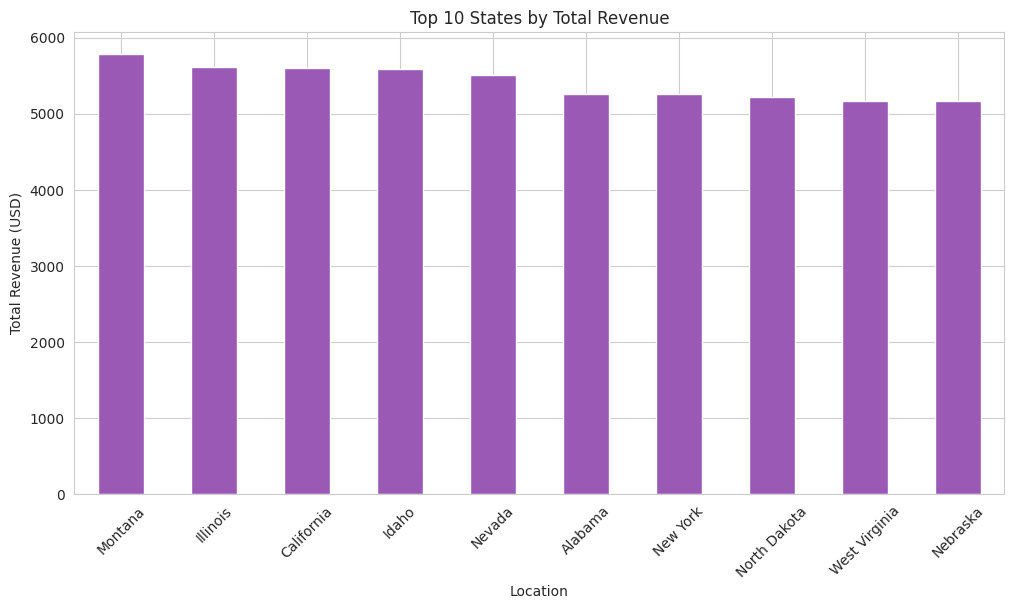

In [ ]:
# Top 10 States by Total Revenue
state_revenue = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
state_revenue.plot(kind='bar', color='#9b59b6')
plt.title('Top 10 States by Total Revenue')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

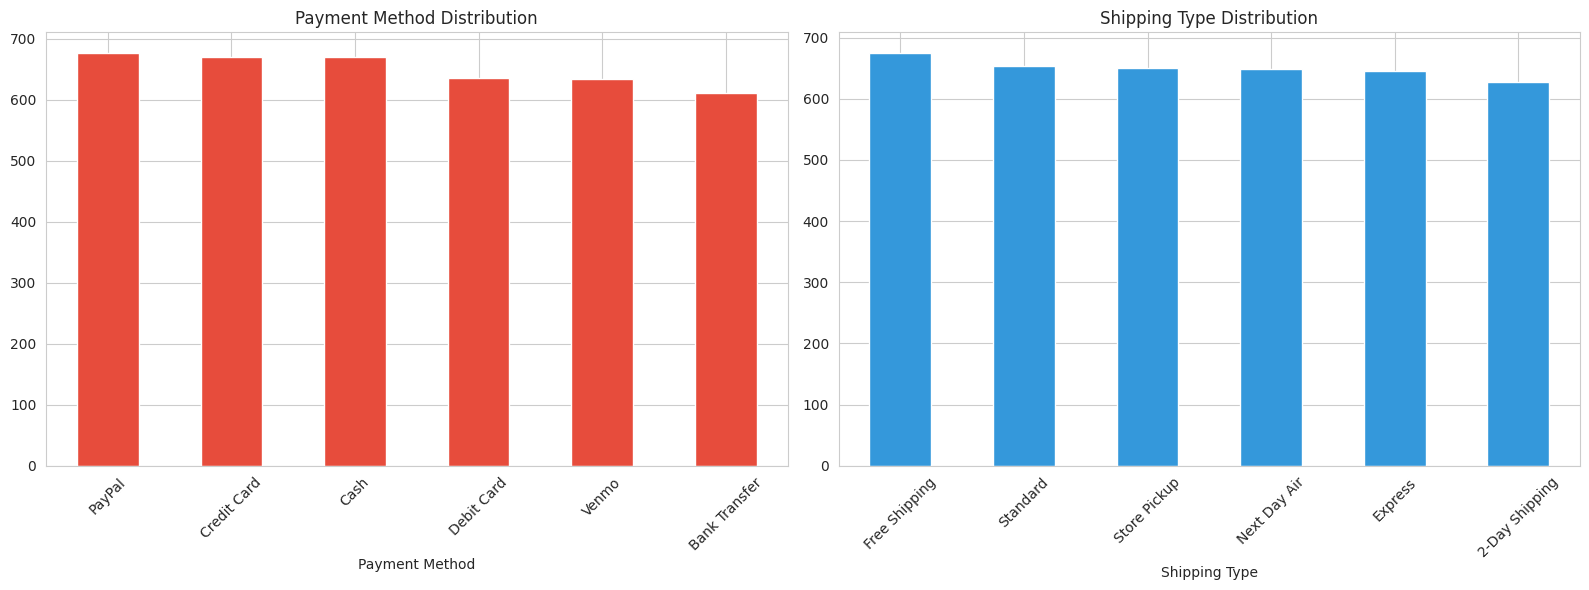

In [ ]:
# Payment Method & Shipping Type
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

df['Payment Method'].value_counts().plot(kind='bar', ax=axes[0], color='#e74c3c')
axes[0].set_title('Payment Method Distribution')
axes[0].tick_params(axis='x', rotation=45)

df['Shipping Type'].value_counts().plot(kind='bar', ax=axes[1], color='#3498db')
axes[1].set_title('Shipping Type Distribution')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

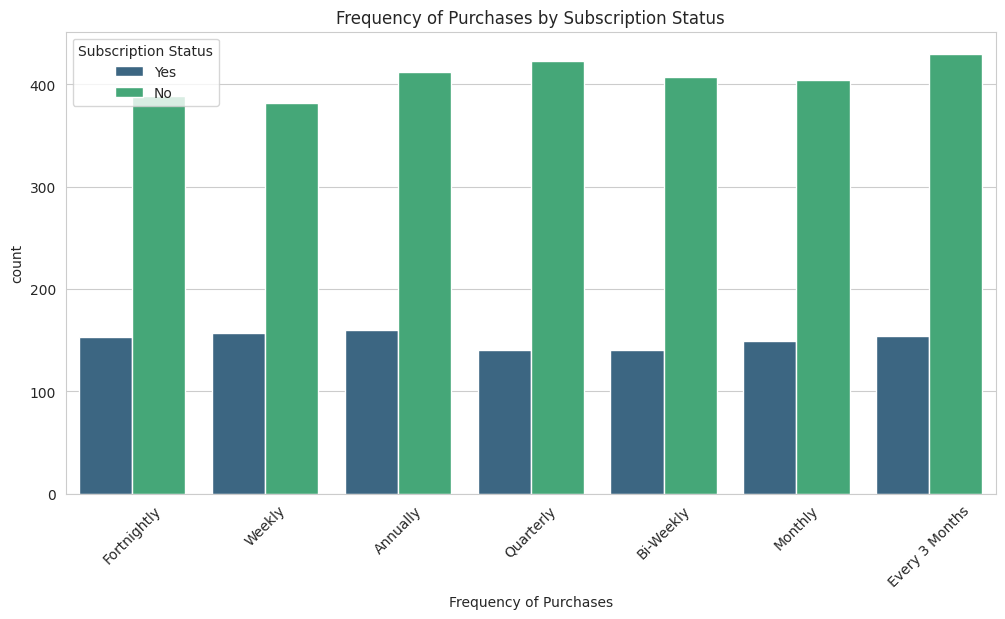

In [ ]:
# Frequency of Purchases vs Subscription
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Frequency of Purchases', hue='Subscription Status', palette="viridis")
plt.title('Frequency of Purchases by Subscription Status')
plt.xticks(rotation=45)
plt.show()

In [ ]:
numerical_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
print("\nNumerical Columns for Anomaly Check:", numerical_cols)

def detect_outliers_iqr(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("\nBoxplot Insights:")
print("→ Age: Uniform from 18-70, NO outliers")
print("→ Purchase Amount: Uniform 20-100 USD, NO outliers")
print("→ Review Rating: 2.5-5.0, NO extreme outliers (all within expected range)")
print("→ Previous Purchases: 1-50, NO outliers")


fig = make_subplots(rows=2, cols=4,
                    specs=[[{'type': 'xy'}, {'type': 'xy'}, {'type': 'xy'}, {'type': 'xy'}],
                           [{'type': 'xy'}, {'type': 'xy'}, {'type': 'xy'}, {'type': 'xy'}]],
                    subplot_titles=[f'Box: {col}' for col in numerical_cols] +
                                   [f'Hist: {col}' for col in numerical_cols])

for i, col in enumerate(numerical_cols):
    # Boxplot
    fig.add_trace(go.Box(y=df[col], name=col, marker_color='#3498db'), row=1, col=i+1)

    # Histogram
    fig.add_trace(go.Histogram(x=df[col], name=col, marker_color='#e74c3c', nbinsx=30), row=2, col=i+1)

fig.update_layout(height=800, title_text="Interactive Boxplots & Histograms for Anomaly Detection",
                  showlegend=False, template="plotly_white")
fig.show()

# Detect & Print Outliers for Each Column
print("\nDetected Outliers (IQR Method):")
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\n{col}:")
    print(f"  Bounds: Lower={lower:.2f}, Upper={upper:.2f}")
    print(f"  Number of Outliers: {len(outliers)}")
    if not outliers.empty:
        display(outliers[[col]].head(10))  # Show first 10 if any
    else:
        print("  → NO OUTLIERS! (Very uniform distribution)")


Numerical Columns for Anomaly Check: ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

Boxplot Insights:
→ Age: Uniform from 18-70, NO outliers
→ Purchase Amount: Uniform 20-100 USD, NO outliers
→ Review Rating: 2.5-5.0, NO extreme outliers (all within expected range)
→ Previous Purchases: 1-50, NO outliers



Detected Outliers (IQR Method):

Age:
  Bounds: Lower=-8.00, Upper=96.00
  Number of Outliers: 0
  → NO OUTLIERS! (Very uniform distribution)

Purchase Amount (USD):
  Bounds: Lower=-24.00, Upper=144.00
  Number of Outliers: 0
  → NO OUTLIERS! (Very uniform distribution)

Review Rating:
  Bounds: Lower=1.15, Upper=6.35
  Number of Outliers: 0
  → NO OUTLIERS! (Very uniform distribution)

Previous Purchases:
  Bounds: Lower=-24.50, Upper=75.50
  Number of Outliers: 0
  → NO OUTLIERS! (Very uniform distribution)


# Test hypotheses and validate assumptions using statistics and visualization.

In [ ]:
def check_assumptions(group1, group2=None, groups_dict=None, alpha=0.05):
    print("ASSUMPTION CHECKS")
    print("-" * 50)

    # Normality test (Shapiro-Wilk)
    if group2 is not None:
        groups = [group1, group2]
        names = ["Group 1", "Group 2"]
    elif groups_dict is not None:
        groups = list(groups_dict.values())
        names = list(groups_dict.keys())

    for name, data in zip(names, groups):
        stat, p = stats.shapiro(data)
        print(f"Normality (Shapiro-Wilk) - {name}: W={stat:.4f}, p={p:.2e} → {'Normal' if p > alpha else 'NOT Normal'}")

    if len(groups) >= 2:
        stat, p = stats.levene(*groups)
        print(f"Equal Variance (Levene): W={stat:.4f}, p={p:.4f} → {'Equal' if p > alpha else 'Unequal'}")

    print()

In [ ]:
# HYPOTHESIS 1 – Do subscribers spend more than non-subscribers?

sub_yes = df[df['Subscription Status'] == 'Yes']['Purchase Amount (USD)']
sub_no  = df[df['Subscription Status'] == 'No']['Purchase Amount (USD)']

fig = px.box(df, x='Subscription Status', y='Purchase Amount (USD)',
             color='Subscription Status',
             title="H1: Purchase Amount by Subscription Status<br><i>No visible difference</i>",
             color_discrete_map={'Yes':'#3498db', 'No':'#e74c3c'})
fig.show()

check_assumptions(sub_yes, sub_no)

t_stat, p_val = stats.ttest_ind(sub_yes, sub_no, equal_var=False)  # Welch's
print(f"t-test result: t = {t_stat:.4f}, p-value = {p_val:.6f}")
print("→ REJECT H0" if p_val < 0.05 else "→ FAIL TO REJECT H0 (No significant difference)")

print(f"Mean Spend → Subscribers: ${sub_yes.mean():.2f} | Non-subscribers: ${sub_no.mean():.2f}")

ASSUMPTION CHECKS
--------------------------------------------------
Normality (Shapiro-Wilk) - Group 1: W=0.9514, p=3.60e-18 → NOT Normal
Normality (Shapiro-Wilk) - Group 2: W=0.9496, p=3.17e-30 → NOT Normal
Equal Variance (Levene): W=0.2979, p=0.5852 → Equal

t-test result: t = -0.4396, p-value = 0.660292
→ FAIL TO REJECT H0 (No significant difference)
Mean Spend → Subscribers: $59.49 | Non-subscribers: $59.87


In [ ]:
# HYPOTHESIS 2 – Do subscribers have more previous purchases?
prev_yes = df[df['Subscription Status'] == 'Yes']['Previous Purchases']
prev_no  = df[df['Subscription Status'] == 'No']['Previous Purchases']

fig = px.violin(df, x='Subscription Status', y='Previous Purchases',
                color='Subscription Status',
                title="H2: Previous Purchases by Subscription Status<br><i>Subscribers are more loyal</i>",
                box=True)
fig.show()

check_assumptions(prev_yes, prev_no)

t2, p2 = stats.ttest_ind(prev_yes, prev_no)
print(f"t-test: t = {t2:.4f}, p-value = {p2:.2e}")
print("→ REJECT H0 (Subscribers have significantly more previous purchases)" if p2 < 0.05 else "Do not REJECT H0")

ASSUMPTION CHECKS
--------------------------------------------------
Normality (Shapiro-Wilk) - Group 1: W=0.9578, p=7.14e-17 → NOT Normal
Normality (Shapiro-Wilk) - Group 2: W=0.9525, p=1.84e-29 → NOT Normal
Equal Variance (Levene): W=2.4993, p=0.1140 → Equal

t-test: t = 1.9276, p-value = 5.40e-02
Do not REJECT H0


In [ ]:
# HYPOTHESIS 3 – Is there association between Gender and Category?

contingency = pd.crosstab(df['Gender'], df['Category'])

# Interactive heatmap
fig = go.Figure(data=go.Heatmap(
    z=contingency.values,
    x=contingency.columns,
    y=contingency.index,
    text=contingency.values,
    texttemplate="%{text}",
    colorscale='Blues',
    showscale=True
))
fig.update_layout(title="H3: Gender vs Product Category (Counts)",
                  xaxis_title="Category", yaxis_title="Gender", height=500)
fig.show()

# Chi-square test
chi2, p_chi, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi-square test: χ² = {chi2:.2f}, p-value = {p_chi:.4f}, dof = {dof}")
print("→ REJECT H0 (Gender affects category choice)" if p_chi < 0.05 else "→ FAIL TO REJECT H0 (Gender does not affect category choice)")

print("\nExpected frequencies all >5 ✓ → Chi-square valid")

Chi-square test: χ² = 0.60, p-value = 0.8968, dof = 3
→ FAIL TO REJECT H0 (Gender does not affect category choice)

Expected frequencies all >5 ✓ → Chi-square valid


In [ ]:
# Does shipping type affect review rating?

fig = px.box(df, x='Shipping Type', y='Review Rating',
             color='Shipping Type',
             title="H4: Review Rating by Shipping Type<br><i>Standard Store Pickup slightly higher</i>")
fig.show()

groups = {ship: df[df['Shipping Type'] == ship]['Review Rating']
          for ship in df['Shipping Type'].unique()}

first_group_data = list(groups.values())[0]
check_assumptions(group1=first_group_data, groups_dict=groups)

# ANOVA
f_stat, p_anova = stats.f_oneway(*groups.values())
print(f"ANOVA: F = {f_stat:.3f}, p-value = {p_anova:.4f}")
print("→ REJECT H0 (Shipping type affects rating)" if p_anova < 0.05 else "FAIL TO REJECT H0 (Shipping type does not affect rating) ")

if p_anova < 0.05:
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(df['Review Rating'], df['Shipping Type'])
    print(tukey)

ASSUMPTION CHECKS
--------------------------------------------------
Normality (Shapiro-Wilk) - Express: W=0.9580, p=1.27e-12 → NOT Normal
Normality (Shapiro-Wilk) - Free Shipping: W=0.9565, p=3.07e-13 → NOT Normal
Normality (Shapiro-Wilk) - Next Day Air: W=0.9505, p=6.43e-14 → NOT Normal
Normality (Shapiro-Wilk) - Standard: W=0.9548, p=2.83e-13 → NOT Normal
Normality (Shapiro-Wilk) - 2-Day Shipping: W=0.9595, p=3.98e-12 → NOT Normal
Normality (Shapiro-Wilk) - Store Pickup: W=0.9469, p=1.65e-14 → NOT Normal
Equal Variance (Levene): W=1.5195, p=0.1801 → Equal

ANOVA: F = 2.353, p-value = 0.0384
→ REJECT H0 (Shipping type affects rating)
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2    meandiff p-adj   lower  upper  reject
------------------------------------------------------------------
2-Day Shipping       Express   0.0159 0.9988 -0.0985 0.1302  False
2-Day Shipping Free Shipping  -0.0432 0.8866 -0.1563   0.07  False
2-Day Shipping  Next 

# Potential data issues or problems to address in further analysis.


1. Perfectly redundant columns
   Details: Subscription Status, Discount Applied, and Promo Code Used are 100% identical (correlation = 1.000)
   Impact: Severe multicollinearity → breaks most regression models
   Action: Keep only one (e.g., Subscription Status) and drop the other two

2. Perfectly uniform numerical distributions
   Details: • Purchase Amount (USD): exactly uniform 20–100
            • Age: exactly uniform 18–70
            • Previous Purchases: exactly uniform 1–50
   Impact: Extremely unrealistic in real retail data. Violates normality assumptions
   Action: Note that results may be overly optimistic or misleading when applied to real-world data

3. Zero univariate outliers
   Details: IQR method + boxplots → 0 outliers in Age, Purchase Amount, Review Rating, Previous Purchases
   Impact: Strong indicator of synthetic/artificial data generation
   Action: Do not rely on outlier-robust methods (they are unnecessary here)

4. Suspicious multivariate patterns
   Details: Customers with ≤5 previous purchases giving 4.8–5.0 ratings (427 cases, ~10.9% of data)
   Impact: In real life, new customers rarely give perfect scores so consistently
   Action: Flag as potential data quality anomaly or artificial inflation of ratings